In [1]:
# Define the inputs
size_sqft = 500.0
age = 10.0
bias = 1

# The inputs flow through the edges, receiving weights
weighted_size = 2.5 * size_sqft
weighted_age = -1.5 * age
weighted_bias = 1000 * bias

# The output node adds the weighted inputs
weighted_sum = weighted_size + weighted_age + weighted_bias

# Generate prediction
print("Predicted Rent:", weighted_sum)

Predicted Rent: 2235.0


In [2]:
## YOUR SOLUTION HERE ##

# Define the inputs
size = 1250.0
age = 15.0
bedrooms = 2.0 
bias = 1

# The inputs flow through the edges, receiving weights


# The output node adds the weighted inputs
weighted_size = size * 3
weighted_age = age * -2.3
weighted_bedrooms = bedrooms * 100
weighted_bias = bias * 500

weighted_sum = weighted_size + weighted_age + weighted_bedrooms + weighted_bias

# Generate prediction
print("Predicted Rent:", weighted_sum)

Predicted Rent: 4415.5


In [4]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
## YOUR SOLUTION HERE ##
import torch.optim as optim

# set a random seed - do not modify
torch.manual_seed(42)

# create neural network
model = nn.Sequential(
    nn.Linear(3,16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,1)
)

# import the data
apartments_df = pd.read_csv("streeteasy.csv")
numerical_features = ['bedrooms', 'bathrooms', 'size_sqft']
X = torch.tensor(apartments_df[numerical_features].values, dtype=torch.float)
y = torch.tensor(apartments_df['rent'].values,dtype=torch.float)

# forward pass
predictions = model(X)

# define the loss function and compute loss
loss = nn.MSELoss()
MSE = loss(predictions,y)
print('Initial loss is ' + str(MSE))

## YOUR SOLUTION HERE ##
optimizer = optim.Adam(model.parameters(), lr = 0.001)
MSE.backward()
optimizer.step()

# feed the data through the updated model and compute the new loss
predictions = model(X)
MSE = loss(predictions,y)
print('After optimization, loss is ' + str(MSE))

/home/chavaraujo/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Initial loss is tensor(29213900., grad_fn=<MseLossBackward0>)
After optimization, loss is tensor(29205544., grad_fn=<MseLossBackward0>)


/home/chavaraujo/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [6]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

apartments_df = pd.read_csv("streeteasy.csv")

numerical_features = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs',
                      'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
                      'has_patio', 'has_gym']

# create tensor of input features
X = torch.tensor(apartments_df[numerical_features].values, dtype=torch.float)
# create tensor of targets
y = torch.tensor(apartments_df['rent'].values, dtype=torch.float).view(-1,1)

In [7]:
# set a random seed - do not modify
torch.manual_seed(42)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(14, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# MSE loss function + optimizer
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## YOUR SOLUTION HERE ##
num_epochs = 500
for epoch in range(num_epochs):
    predictions = model(X) 
    MSE = loss(predictions, y)
    MSE.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    ## DO NOT MODIFY ##
    # keep track of the loss during training
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')

Epoch [100/500], MSE Loss: 3136163.5
Epoch [200/500], MSE Loss: 3019611.75
Epoch [300/500], MSE Loss: 2938490.0
Epoch [400/500], MSE Loss: 2867499.5
Epoch [500/500], MSE Loss: 2807188.5


In [9]:
# set a random seed - do not modify
torch.manual_seed(42)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(14, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# MSE loss function + optimizer
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## YOUR SOLUTION HERE ##
num_epochs = 1000
for epoch in range(num_epochs):
    predictions = model(X)
    MSE = loss(predictions, y)
    MSE.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    
    ## DO NOT MODIFY ##
    # keep track of the loss during training
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')

Epoch [100/1000], MSE Loss: 3136163.5
Epoch [200/1000], MSE Loss: 3019611.75
Epoch [300/1000], MSE Loss: 2938490.0
Epoch [400/1000], MSE Loss: 2867499.5
Epoch [500/1000], MSE Loss: 2807188.5
Epoch [600/1000], MSE Loss: 2757318.75
Epoch [700/1000], MSE Loss: 2716579.75
Epoch [800/1000], MSE Loss: 2683151.5
Epoch [900/1000], MSE Loss: 2656409.5
Epoch [1000/1000], MSE Loss: 2633397.0


In [10]:
## YOUR SOLUTION HERE ##
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 2)


In [11]:
# set a random seed - do not modify
torch.manual_seed(42)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(14, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# MSE loss function + optimizer
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## YOUR SOLUTION HERE ##
num_epochs = 1000
for epoch in range(num_epochs):
    predictions = model(X_train) 
    MSE = loss(predictions, y_train) 
    MSE.backward()
    optimizer.step() 
    optimizer.zero_grad()
    
    ## DO NOT MODIFY ##
    # keep track of the loss during training
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')

Epoch [100/1000], MSE Loss: 3144756.75
Epoch [200/1000], MSE Loss: 3030343.5
Epoch [300/1000], MSE Loss: 2950239.0
Epoch [400/1000], MSE Loss: 2880079.25
Epoch [500/1000], MSE Loss: 2820468.25
Epoch [600/1000], MSE Loss: 2771156.0
Epoch [700/1000], MSE Loss: 2730910.0
Epoch [800/1000], MSE Loss: 2697787.75
Epoch [900/1000], MSE Loss: 2671344.25
Epoch [1000/1000], MSE Loss: 2648587.0


In [12]:
torch.save(model, 'model.pth')

In [16]:
loaded_model = torch.load('model20k.pth')
loaded_model.eval()
with torch.no_grad():
    predictions = loaded_model(X_test)
    test_MSE = loss(predictions, y_test)

# show output
print('Test MSE is ' + str(test_MSE.item()))
print('Test Root MSE is ' + str(test_MSE.item()**(1/2)))

Test MSE is 1997976.75
Test Root MSE is 1413.4980544733692


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

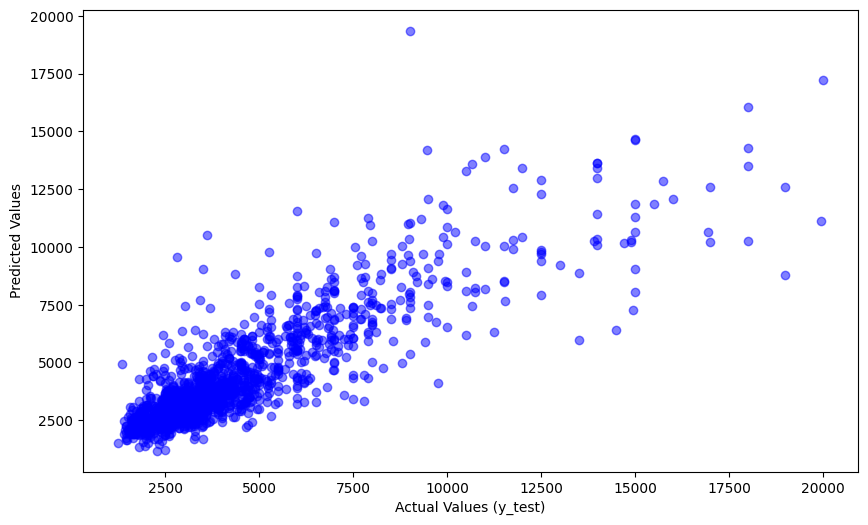

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, label='Predictions', alpha=0.5, color='blue')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2,
         label="Actual Rent")
plt.legend()
plt.title('StreetEasy Dataset - Predictions vs Actual Values')
plt.show()